# Описание базы PTBDB
###### База PTBDB содержит записи 549 ЭКГ. Каждая запись относиться к одному из девяти классов:
- Инфаркт миокарда            (148)<br>
- Сердечная недостаточность	(18)<br>
- Межжелудочковая блокада	    (15)<br>
- Дисритмия	                (14)<br>
- Гипертрофия миокарда	    (7)<br>
- Заболевания клапана сердца	(6)<br>
- Миокардит	                (4)<br>
- Смешанный диагноз	        (4)<br>
- Здоров 	                    (52)<br>
<br>
Каждая ЭКГ описывается набором характеристик, подсчитанных по сегментации PQRST комплексов 15 отведений ЭКГ (включаются отведения VX, VY, VZ). Все признаки числовые, имееют различных физический смысл (проценты, время, вольтаж и т.д)<br>
В данной базе есть пропуски в данных (в некоторых отведениях не удалось отсегментировать волны, из-за этого невозожно подсчитать такие характеристики как среднее, дисперсию, медиану и т.д.)<br>
Поскольку все классы, кроме больных инфарктом миокарда и здоровых малопредставительны, в данный работе будет рассмотрена задача бинарной классификации на данные два класса (Myocardial infarction и Healthy control).

# Быстрый старт в анализ данных

**с помощью `Pandas` и `Scikit-learn`,**
**а также `numpy` и `matplotlib`**

- `numpy` – матричные операции
- `matplotlib` – научная графика
- `pandas` – таблицы (DataFrame) для анализа данных
- `scikit-learn` – алгоритмы машинного обучения




In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

#### Загружаем данные из файла. Характеристики разделены знаком табуляции, а неизвестные характеристики имеют значение 'n'

In [2]:
data = pd.read_csv('ptbdb.txt', sep='\t', engine='python', na_values='n')

In [3]:
type(data)

pandas.core.frame.DataFrame

#### Выводим данные

In [4]:
data

,lead_i_mean_rr,lead_i_std_rr,lead_i_mean_qrs,lead_i_std_qrs,lead_i_normal_qrs,lead_i_flexure_qrs,lead_i_extra_qrs,lead_i_mean_r_val,lead_i_std_r_val,lead_i_presence_p,...,lead_vz_mean_qt,lead_vz_std_qt,lead_vz_mean_st,lead_vz_std_st,lead_vz_normal_t,lead_vz_flexure_t,lead_vz_biphasic_t,lead_vz_mean_t_val,lead_vz_std_t_val,diagnosis
0,2.926800,0.035307,0.664195,0.008379,100.00000,0.000000,0.000000,0.103040,0.002381,100,...,1.612500,0.028060,0.001697,0.000713,100.00000,0.000000,0.000000,1.650880e-02,0.000622,Myocardial infarction
1,2.782296,0.020817,0.719141,0.023549,100.00000,0.000000,0.000000,0.122239,0.003083,100,...,1.605153,0.087975,0.002294,0.004006,80.36810,3.067485,16.564420,2.658127e-02,0.008337,Myocardial infarction
2,3.005627,0.038996,0.747497,0.026602,100.00000,0.000000,0.000000,0.135683,0.004276,100,...,1.717067,0.034247,0.004016,0.002159,99.33333,0.666667,0.000000,2.594880e-02,0.000763,Myocardial infarction
3,3.022693,0.227551,0.444821,0.035223,98.67550,0.662252,0.662252,NaN,0.007604,0,...,1.600378,0.009315,0.004865,0.000928,100.00000,0.000000,0.000000,5.652638e-02,0.001717,Myocardial infarction
4,3.318307,0.093868,0.491073,0.049116,100.00000,0.000000,0.000000,0.080101,0.012597,0,...,1.519353,0.069415,NaN,0.004095,99.26471,0.000000,0.735294,NaN,0.006320,Myocardial infarction
5,2.907795,0.027377,0.380662,0.074972,100.00000,0.000000,0.000000,0.127972,0.005701,100,...,1.321026,0.162370,0.002979,0.000783,95.51282,0.000000,4.487179,NaN,0.002666,Myocardial infarction
6,2.963169,0.042756,0.381677,0.077884,100.00000,0.000000,0.000000,0.129618,0.006368,100,...,1.368368,0.214308,0.003217,0.000795,92.10526,0.000000,7.894737,NaN,0.003320,Myocardial infarction
7,2.561714,0.084710,0.407680,0.017579,100.00000,0.000000,0.000000,0.070732,0.004904,100,...,1.208340,0.008880,0.006042,0.000890,100.00000,0.000000,0.000000,NaN,0.002477,Myocardial infarction
8,2.515667,0.208059,0.419673,0.029680,97.95918,0.000000,2.040816,0.073059,0.004291,0,...,1.254667,0.102086,0.005816,0.001243,87.50000,0.000000,12.500000,NaN,0.003604,Myocardial infarction
9,2.324513,0.147669,0.479061,0.103228,100.00000,0.000000,0.000000,0.053814,0.003995,0,...,1.125395,0.029873,0.009090,0.001833,99.48718,0.000000,0.512821,NaN,0.002171,Myocardial infarction


In [5]:
print(data)

     lead_i_mean_rr  lead_i_std_rr  lead_i_mean_qrs  lead_i_std_qrs  \
0          2.926800       0.035307         0.664195        0.008379   
1          2.782296       0.020817         0.719141        0.023549   
2          3.005627       0.038996         0.747497        0.026602   
3          3.022693       0.227551         0.444821        0.035223   
4          3.318307       0.093868         0.491073        0.049116   
5          2.907795       0.027377         0.380662        0.074972   
6          2.963169       0.042756         0.381677        0.077884   
7          2.561714       0.084710         0.407680        0.017579   
8          2.515667       0.208059         0.419673        0.029680   
9          2.324513       0.147669         0.479061        0.103228   
10         2.614345       0.253084         0.362926        0.058835   
11         3.693333       0.188462         0.374484        0.060117   
12         2.733182       0.037732         0.321333        0.003477   
13    

##### Выводим названия характеристик. Как видно, на каждое отведение приходится  $465\div15 = 31$ характеристика

In [6]:
# Последняя характеристика - поле диагноза
print("Всего характеристик: " + str(len(data.columns) - 1))
data.columns

Всего характеристик: 465


Index(['lead_i_mean_rr', 'lead_i_std_rr', 'lead_i_mean_qrs', 'lead_i_std_qrs',
       'lead_i_normal_qrs', 'lead_i_flexure_qrs', 'lead_i_extra_qrs',
       'lead_i_mean_r_val', 'lead_i_std_r_val', 'lead_i_presence_p',
       ...
       'lead_vz_mean_qt', 'lead_vz_std_qt', 'lead_vz_mean_st',
       'lead_vz_std_st', 'lead_vz_normal_t', 'lead_vz_flexure_t',
       'lead_vz_biphasic_t', 'lead_vz_mean_t_val', 'lead_vz_std_t_val',
       'diagnosis'],
      dtype='object', length=466)

##### Выводим первые 5 примеров выборки

In [7]:
data.head()

,lead_i_mean_rr,lead_i_std_rr,lead_i_mean_qrs,lead_i_std_qrs,lead_i_normal_qrs,lead_i_flexure_qrs,lead_i_extra_qrs,lead_i_mean_r_val,lead_i_std_r_val,lead_i_presence_p,...,lead_vz_mean_qt,lead_vz_std_qt,lead_vz_mean_st,lead_vz_std_st,lead_vz_normal_t,lead_vz_flexure_t,lead_vz_biphasic_t,lead_vz_mean_t_val,lead_vz_std_t_val,diagnosis
0,2.926800,0.035307,0.664195,0.008379,100.0000,0.000000,0.000000,0.103040,0.002381,100,...,1.612500,0.028060,0.001697,0.000713,100.00000,0.000000,0.000000,0.016509,0.000622,Myocardial infarction
1,2.782296,0.020817,0.719141,0.023549,100.0000,0.000000,0.000000,0.122239,0.003083,100,...,1.605153,0.087975,0.002294,0.004006,80.36810,3.067485,16.564420,0.026581,0.008337,Myocardial infarction
2,3.005627,0.038996,0.747497,0.026602,100.0000,0.000000,0.000000,0.135683,0.004276,100,...,1.717067,0.034247,0.004016,0.002159,99.33333,0.666667,0.000000,0.025949,0.000763,Myocardial infarction
3,3.022693,0.227551,0.444821,0.035223,98.6755,0.662252,0.662252,NaN,0.007604,0,...,1.600378,0.009315,0.004865,0.000928,100.00000,0.000000,0.000000,0.056526,0.001717,Myocardial infarction
4,3.318307,0.093868,0.491073,0.049116,100.0000,0.000000,0.000000,0.080101,0.012597,0,...,1.519353,0.069415,NaN,0.004095,99.26471,0.000000,0.735294,NaN,0.006320,Myocardial infarction


##### Выводим последние 5 примеров выборки

In [8]:
data.tail()

,lead_i_mean_rr,lead_i_std_rr,lead_i_mean_qrs,lead_i_std_qrs,lead_i_normal_qrs,lead_i_flexure_qrs,lead_i_extra_qrs,lead_i_mean_r_val,lead_i_std_r_val,lead_i_presence_p,...,lead_vz_mean_qt,lead_vz_std_qt,lead_vz_mean_st,lead_vz_std_st,lead_vz_normal_t,lead_vz_flexure_t,lead_vz_biphasic_t,lead_vz_mean_t_val,lead_vz_std_t_val,diagnosis
544,2.042667,1.017424,0.431869,0.128409,81.96721,0.0,18.032790,0.193817,0.144916,0,...,1.150082,0.313062,NaN,0.011585,87.67123,1.369863,10.958900,NaN,0.042714,Myocardial infarction
545,2.243927,0.093078,0.485714,0.003918,100.00000,0.0,0.000000,0.111728,0.008792,100,...,1.478593,0.077697,NaN,0.001537,100.00000,0.000000,0.000000,0.015531,0.008725,Myocardial infarction
546,2.399265,1.525484,0.443840,0.115668,68.00000,2.0,30.000000,0.142087,0.167847,0,...,1.415083,0.314857,0.016917,0.038195,72.91667,18.750000,8.333333,0.019350,0.075903,Myocardial infarction
547,3.327889,0.341675,0.416216,0.003077,94.59459,0.0,5.405405,0.171111,0.010845,0,...,1.796889,0.046131,0.006774,0.001403,100.00000,0.000000,0.000000,0.062217,0.004426,Myocardial infarction
548,3.168513,0.223191,0.313500,0.025964,97.50000,0.0,2.500000,0.220316,0.006745,0,...,1.503795,0.180897,0.002142,0.000703,87.17949,0.000000,12.820510,NaN,0.000979,Myocardial infarction


### Описание признаков:
- `mean_rr` - средний RR
- `std_rr` - корень из дисперсии для RR-распределения
- `mean_qrs` - средний QRS
- `std_qrs` - корень из дисперсии для распределения длин QRS
- `normal_qrs` - процент нормальных QRS
- `flexure_qrs` - процент м-образных QRS 
- `extra_qrs` - процент экстрасистол QRS 
- `mean_r_val` - среднее значение R-пика
- `std_r_val` - корень из дисперсии для распределения значений R-пиков
<br><br>
- `presence_p` - доля комплексов, у которых есть P
- `mean_p` - средняя длина P
- `std_p` - корень из дисперсии для распределения длин P
- `mean_pq` - среднее расстояние между началом P и началом QRS
- `std_pq` - корень из дисперсии для распределения расстояний между началом P и началом QRS
- `normal_p` - процент нормальных P
- `flexure_p` - процент м-образных P
- `biphasic_p` - процент бифазных P
- `mean_p_val` - среднее значение P-пика
- `std_p_val` - корень из дисперсии для распределения значений P-пиков
<br><br>
- `presence_t` - доля комплексов, у которых есть T
- `mean_t` - средняя длина T
- `std_t` - корень из дисперсии для распределения длин T
- `mean_qt` - среднее расстояние между началом QRS и концом T
- `std_qt` - корень из дисперсии для распределения расстояний между началом QRS и концом T
- `mean_st` - среднее расстояние между концом QRS и началом T
- `std_st` - корень из дисперсии для распределения расстояний между концом QRS и началом T
- `normal_t` - процент нормальных T
- `flexure_t` - процент м-образных T
- `biphasic_t` - процент бифазных T
- `mean_t_val` - среднее значение T-пика
- `std_t_val` - корень из дисперсии для распределения значений T-пиков

#### База содержит 549 записей. Каждая запись описывается 465 характеристиками + диагнозом.

In [9]:
print(data.shape)
print(data.columns)

(549, 466)
Index(['lead_i_mean_rr', 'lead_i_std_rr', 'lead_i_mean_qrs', 'lead_i_std_qrs',
       'lead_i_normal_qrs', 'lead_i_flexure_qrs', 'lead_i_extra_qrs',
       'lead_i_mean_r_val', 'lead_i_std_r_val', 'lead_i_presence_p',
       ...
       'lead_vz_mean_qt', 'lead_vz_std_qt', 'lead_vz_mean_st',
       'lead_vz_std_st', 'lead_vz_normal_t', 'lead_vz_flexure_t',
       'lead_vz_biphasic_t', 'lead_vz_mean_t_val', 'lead_vz_std_t_val',
       'diagnosis'],
      dtype='object', length=466)


In [10]:
data.index

RangeIndex(start=0, stop=549, step=1)

#### Выводим диагноз первого пациента

In [11]:
data.at[0, 'diagnosis']

'Myocardial infarction'

#### Выводим столбец с диагнозами

In [12]:
data['diagnosis']

0      Myocardial infarction
1      Myocardial infarction
2      Myocardial infarction
3      Myocardial infarction
4      Myocardial infarction
5      Myocardial infarction
6      Myocardial infarction
7      Myocardial infarction
8      Myocardial infarction
9      Myocardial infarction
10     Myocardial infarction
11     Myocardial infarction
12     Myocardial infarction
13     Myocardial infarction
14     Myocardial infarction
15     Myocardial infarction
16     Myocardial infarction
17     Myocardial infarction
18     Myocardial infarction
19     Myocardial infarction
20     Myocardial infarction
21     Myocardial infarction
22     Myocardial infarction
23     Myocardial infarction
24     Myocardial infarction
25     Myocardial infarction
26     Myocardial infarction
27     Myocardial infarction
28     Myocardial infarction
29     Myocardial infarction
               ...          
519                      NaN
520          Healthy control
521          Healthy control
522           

#### Выводим
- Процент нормальных t в первом отведении у четвёртой записи
- Тип столбца `lead_i_normal_t`
- Первые 5 записей подвыборки из двух стобцов `lead_i_normal_t` и `lead_i_mean_rr`
<br><br>
Все столбцы (кроме диагноза) числовые 

In [13]:
data['lead_i_normal_t'][3]

100.0

In [14]:
data['lead_i_normal_t'].dtype.name

'float64'

In [15]:
type(data['lead_i_normal_t'][3])

numpy.float64

In [16]:
type(data['lead_i_normal_t'])

pandas.core.series.Series

In [17]:
data[['lead_i_normal_t', 'lead_i_mean_rr']].head()

,lead_i_normal_t,lead_i_mean_rr
0,100.0000,2.926800
1,88.2716,2.782296
2,80.0000,3.005627
3,100.0000,3.022693
4,100.0000,3.318307


#### Pandas может подсчитать некоторые характеристики для столбцов

In [18]:
data.describe()

,lead_i_mean_rr,lead_i_std_rr,lead_i_mean_qrs,lead_i_std_qrs,lead_i_normal_qrs,lead_i_flexure_qrs,lead_i_extra_qrs,lead_i_mean_r_val,lead_i_std_r_val,lead_i_presence_p,...,lead_vz_std_t,lead_vz_mean_qt,lead_vz_std_qt,lead_vz_mean_st,lead_vz_std_st,lead_vz_normal_t,lead_vz_flexure_t,lead_vz_biphasic_t,lead_vz_mean_t_val,lead_vz_std_t_val
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,526.000000,549.000000,549.000000,...,549.000000,549.000000,549.000000,363.000000,549.000000,549.000000,549.000000,549.000000,138.000000,549.000000
mean,3.249241,0.269778,0.420728,0.044480,96.176920,0.098999,3.724082,0.115431,0.012513,73.952641,...,0.090928,1.550868,0.097915,0.006019,0.002247,88.389160,0.645145,10.965695,0.017578,0.005202
std,0.817589,0.557330,0.096426,0.042382,11.871603,0.859044,11.527777,0.058875,0.020018,43.929330,...,0.081764,0.191202,0.112364,0.006013,0.002941,21.967599,2.866438,21.583156,0.013325,0.008415
min,0.833372,0.003175,0.259458,0.001696,25.000000,0.000000,0.000000,0.003268,0.001661,0.000000,...,0.005062,0.945161,0.003062,0.000004,0.000029,0.000000,0.000000,0.000000,-0.014386,0.000051
25%,2.790025,0.060525,0.344241,0.010100,100.000000,0.000000,0.000000,0.070822,0.004320,0.000000,...,0.021977,1.441116,0.016654,0.001773,0.000790,87.425150,0.000000,0.000000,0.007932,0.001353
50%,3.219915,0.114497,0.420842,0.032543,100.000000,0.000000,0.000000,0.109087,0.006247,100.000000,...,0.058979,1.546087,0.060108,0.004280,0.001224,100.000000,0.000000,0.000000,0.015380,0.002335
75%,3.707471,0.254056,0.464630,0.070030,100.000000,0.000000,0.000000,0.148200,0.010115,100.000000,...,0.147107,1.659459,0.141826,0.008434,0.002418,100.000000,0.000000,11.538460,0.024205,0.005311
max,8.331273,10.173780,0.760000,0.257754,100.000000,13.732390,75.000000,0.428764,0.176756,100.000000,...,0.399596,2.536529,0.828548,0.038523,0.038195,100.000000,48.905110,100.000000,0.062217,0.084463


#### Строим графики попарных распределений первых 15 признаков первого отведения

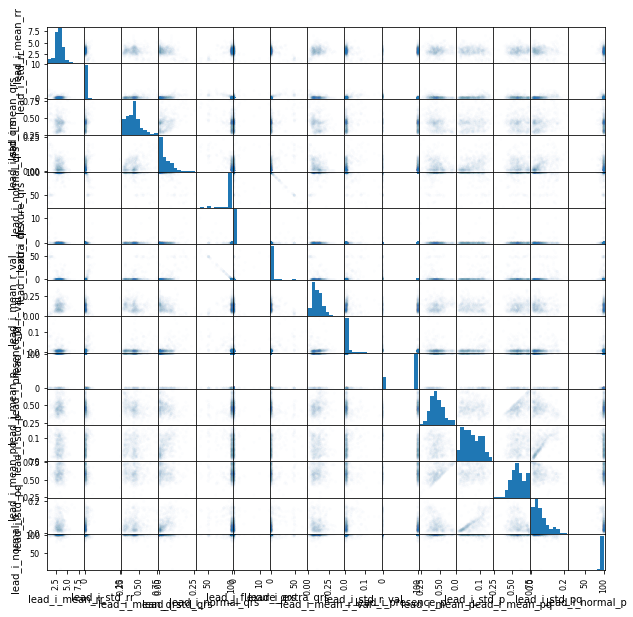

In [19]:
from pandas.plotting import scatter_matrix
scatter_matrix(data.iloc[:, :15], alpha = .01, figsize = (10, 10))
pass

#### Корреляция  первых 15 признаков первого отведения

In [20]:
data.iloc[:, :15].corr()

,lead_i_mean_rr,lead_i_std_rr,lead_i_mean_qrs,lead_i_std_qrs,lead_i_normal_qrs,lead_i_flexure_qrs,lead_i_extra_qrs,lead_i_mean_r_val,lead_i_std_r_val,lead_i_presence_p,lead_i_mean_p,lead_i_std_p,lead_i_mean_pq,lead_i_std_pq,lead_i_normal_p
lead_i_mean_rr,1.000000,0.097858,-0.127484,-0.311759,0.346670,-0.228095,-0.340012,0.204208,-0.227348,0.155938,0.080416,-0.095640,0.025228,-0.066718,-0.056342
lead_i_std_rr,0.097858,1.000000,0.226518,0.356452,-0.670755,0.209777,0.675129,-0.068523,0.493344,-0.459596,-0.213814,0.182521,-0.192884,0.276931,-0.067213
lead_i_mean_qrs,-0.127484,0.226518,1.000000,0.335174,-0.350506,0.236605,0.343329,-0.215428,0.254911,-0.233844,-0.282544,0.157039,-0.068466,0.216652,-0.110106
lead_i_std_qrs,-0.311759,0.356452,0.335174,1.000000,-0.571358,0.345226,0.562673,-0.309758,0.485730,-0.453181,-0.250986,0.425921,-0.121256,0.478334,-0.139038
lead_i_normal_qrs,0.346670,-0.670755,-0.350506,-0.571358,1.000000,-0.430628,-0.997736,0.238545,-0.623624,0.542839,0.184500,-0.230965,0.087206,-0.277274,0.048968
lead_i_flexure_qrs,-0.228095,0.209777,0.236605,0.345226,-0.430628,1.000000,0.368952,-0.158482,0.181145,-0.190490,-0.107624,0.125067,-0.100124,0.175200,-0.038431
lead_i_extra_qrs,-0.340012,0.675129,0.343329,0.562673,-0.997736,0.368952,1.000000,-0.233424,0.628725,-0.544834,-0.181982,0.228534,-0.082346,0.272488,-0.047565
lead_i_mean_r_val,0.204208,-0.068523,-0.215428,-0.309758,0.238545,-0.158482,-0.233424,1.000000,-0.041423,0.022229,0.243626,-0.075077,0.090002,-0.115373,0.062128
lead_i_std_r_val,-0.227348,0.493344,0.254911,0.485730,-0.623624,0.181145,0.628725,-0.041423,1.000000,-0.455458,-0.175544,0.230594,-0.076112,0.283905,-0.038458
lead_i_presence_p,0.155938,-0.459596,-0.233844,-0.453181,0.542839,-0.190490,-0.544834,0.022229,-0.455458,1.000000,0.298907,-0.409767,0.130656,-0.508112,0.104078


#### На графиках и в таблице видно, что, например, признаки `lead_i_std_p` и `lead_i_std_pq` коррелированы (коэффикиент корреляции `0.710299`), изобразим наши данные в проекции на эти 2 признака

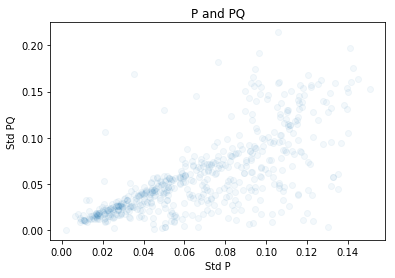

In [21]:
plt.plot(data['lead_i_std_p'], data['lead_i_std_pq'], 'o', alpha = 0.05)
plt.xlabel('Std P')
plt.ylabel('Std PQ')
plt.title('P and PQ')
pass

#### Узнаем какие записи имеют, процент нормальных QRS в первом отведении более 90%

In [22]:
data['lead_i_normal_qrs'] >= 90

0       True
1       True
2       True
3       True
4       True
5       True
6       True
7       True
8       True
9       True
10      True
11      True
12      True
13      True
14      True
15      True
16      True
17      True
18      True
19      True
20      True
21      True
22      True
23     False
24      True
25     False
26      True
27      True
28      True
29      True
       ...  
519     True
520     True
521     True
522    False
523    False
524    False
525     True
526     True
527     True
528     True
529     True
530     True
531     True
532     True
533     True
534     True
535     True
536    False
537    False
538     True
539     True
540    False
541     True
542    False
543     True
544    False
545     True
546    False
547     True
548     True
Name: lead_i_normal_qrs, Length: 549, dtype: bool

#### Посмотрим, как распределены 2 признака `mean_st` и `std_st` у здоровых и у больных инфарктом миокарда

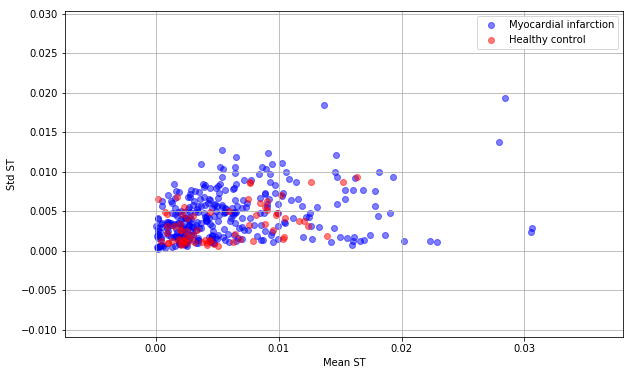

In [23]:
plt.figure(figsize = (10, 6))

plt.scatter(data[data['diagnosis'] == 'Myocardial infarction']['lead_i_mean_st'],
            data[data['diagnosis'] == 'Myocardial infarction']['lead_i_std_st'],
            alpha = 0.5,
            label = 'Myocardial infarction',
            color = 'b')

plt.scatter(data[data['diagnosis'] == 'Healthy control']['lead_i_mean_st'],
            data[data['diagnosis'] == 'Healthy control']['lead_i_std_st'],
            alpha = 0.5,
            label = 'Healthy control',
            color = 'r')

plt.xlabel('Mean ST')
plt.ylabel('Std ST')
plt.legend()
plt.grid()

#### `mean_qrs` и `std_qrs`

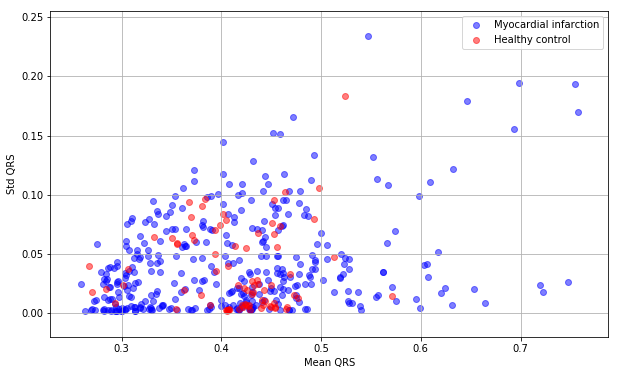

In [24]:
plt.figure(figsize = (10, 6))

plt.scatter(data[data['diagnosis'] == 'Myocardial infarction']['lead_i_mean_qrs'],
            data[data['diagnosis'] == 'Myocardial infarction']['lead_i_std_qrs'],
            alpha = 0.5,
            label = 'Myocardial infarction',
            color = 'b')

plt.scatter(data[data['diagnosis'] == 'Healthy control']['lead_i_mean_qrs'],
            data[data['diagnosis'] == 'Healthy control']['lead_i_std_qrs'],
            alpha = 0.5,
            label = 'Healthy control',
            color = 'r')

plt.xlabel('Mean QRS')
plt.ylabel('Std QRS')
plt.legend()
plt.grid()

##### Краткое описание признака `diagnosis`

In [25]:
data.describe(include = ['object'])

,diagnosis
count,522
unique,14
top,Myocardial infarction
freq,368


#### Описание всех признаков

In [26]:
data.describe(include = 'all')

,lead_i_mean_rr,lead_i_std_rr,lead_i_mean_qrs,lead_i_std_qrs,lead_i_normal_qrs,lead_i_flexure_qrs,lead_i_extra_qrs,lead_i_mean_r_val,lead_i_std_r_val,lead_i_presence_p,...,lead_vz_mean_qt,lead_vz_std_qt,lead_vz_mean_st,lead_vz_std_st,lead_vz_normal_t,lead_vz_flexure_t,lead_vz_biphasic_t,lead_vz_mean_t_val,lead_vz_std_t_val,diagnosis
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,526.000000,549.000000,549.000000,...,549.000000,549.000000,363.000000,549.000000,549.000000,549.000000,549.000000,138.000000,549.000000,522
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Myocardial infarction
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,368
mean,3.249241,0.269778,0.420728,0.044480,96.176920,0.098999,3.724082,0.115431,0.012513,73.952641,...,1.550868,0.097915,0.006019,0.002247,88.389160,0.645145,10.965695,0.017578,0.005202,NaN
std,0.817589,0.557330,0.096426,0.042382,11.871603,0.859044,11.527777,0.058875,0.020018,43.929330,...,0.191202,0.112364,0.006013,0.002941,21.967599,2.866438,21.583156,0.013325,0.008415,NaN
min,0.833372,0.003175,0.259458,0.001696,25.000000,0.000000,0.000000,0.003268,0.001661,0.000000,...,0.945161,0.003062,0.000004,0.000029,0.000000,0.000000,0.000000,-0.014386,0.000051,NaN
25%,2.790025,0.060525,0.344241,0.010100,100.000000,0.000000,0.000000,0.070822,0.004320,0.000000,...,1.441116,0.016654,0.001773,0.000790,87.425150,0.000000,0.000000,0.007932,0.001353,NaN
50%,3.219915,0.114497,0.420842,0.032543,100.000000,0.000000,0.000000,0.109087,0.006247,100.000000,...,1.546087,0.060108,0.004280,0.001224,100.000000,0.000000,0.000000,0.015380,0.002335,NaN
75%,3.707471,0.254056,0.464630,0.070030,100.000000,0.000000,0.000000,0.148200,0.010115,100.000000,...,1.659459,0.141826,0.008434,0.002418,100.000000,0.000000,11.538460,0.024205,0.005311,NaN


#### Список всех диагнозов

In [27]:
data['diagnosis'].unique()

array(['Myocardial infarction', 'Healthy control',
       'Valvular heart disease', 'Dysrhythmia', 'Heart failure (NYHA 2)',
       'Heart failure (NYHA 3)', nan, 'Heart failure (NYHA 4)',
       'Palpitation', 'Cardiomyopathy', 'Stable angina', 'Hypertrophy',
       'Bundle branch block', 'Unstable angina', 'Myocarditis'], dtype=object)

#### Длина QRS у первых представителей каждого класса

In [28]:
for name in data['diagnosis'].unique():
    if (len(data[data['diagnosis'] == name]['lead_i_mean_qrs']) > 0):
        print(name, data[data['diagnosis'] == name]['lead_i_mean_qrs'].iloc[0])

Myocardial infarction 0.6641951
Healthy control 0.2843103
Valvular heart disease 0.5
Dysrhythmia 0.4208421
Heart failure (NYHA 2) 0.3107059
Heart failure (NYHA 3) 0.628
Heart failure (NYHA 4) 0.4546667
Palpitation 0.4252222
Cardiomyopathy 0.4243939
Stable angina 0.3035714
Hypertrophy 0.3961916
Bundle branch block 0.6492138
Unstable angina 0.5312542
Myocarditis 0.2968


# Готовим данные

In [29]:
data['diagnosis'].dtype.name

'object'

In [30]:
data['lead_i_mean_rr'].dtype.name

'float64'

#### Единственный нечисловой признак - диагноз

In [31]:
categorical_columns = []
numerical_columns = []
for c in data.columns:
    if data[c].dtype.name == 'object':
        categorical_columns.append(c)
    else:
        numerical_columns.append(c)          

In [32]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['diagnosis']
['lead_i_mean_rr', 'lead_i_std_rr', 'lead_i_mean_qrs', 'lead_i_std_qrs', 'lead_i_normal_qrs', 'lead_i_flexure_qrs', 'lead_i_extra_qrs', 'lead_i_mean_r_val', 'lead_i_std_r_val', 'lead_i_presence_p', 'lead_i_mean_p', 'lead_i_std_p', 'lead_i_mean_pq', 'lead_i_std_pq', 'lead_i_normal_p', 'lead_i_flexure_p', 'lead_i_biphasic_p', 'lead_i_mean_p_val', 'lead_i_std_p_val', 'lead_i_presence_t', 'lead_i_mean_t', 'lead_i_std_t', 'lead_i_mean_qt', 'lead_i_std_qt', 'lead_i_mean_st', 'lead_i_std_st', 'lead_i_normal_t', 'lead_i_flexure_t', 'lead_i_biphasic_t', 'lead_i_mean_t_val', 'lead_i_std_t_val', 'lead_ii_mean_rr', 'lead_ii_std_rr', 'lead_ii_mean_qrs', 'lead_ii_std_qrs', 'lead_ii_normal_qrs', 'lead_ii_flexure_qrs', 'lead_ii_extra_qrs', 'lead_ii_mean_r_val', 'lead_ii_std_r_val', 'lead_ii_presence_p', 'lead_ii_mean_p', 'lead_ii_std_p', 'lead_ii_mean_pq', 'lead_ii_std_pq', 'lead_ii_normal_p', 'lead_ii_flexure_p', 'lead_ii_biphasic_p', 'lead_ii_mean_p_val', 'lead_ii_std_p_val', 'lead_ii_

#### Возможные значения диагноза

In [33]:
for c in categorical_columns:
    print(c, data[c].unique())

diagnosis ['Myocardial infarction' 'Healthy control' 'Valvular heart disease'
 'Dysrhythmia' 'Heart failure (NYHA 2)' 'Heart failure (NYHA 3)' nan
 'Heart failure (NYHA 4)' 'Palpitation' 'Cardiomyopathy' 'Stable angina'
 'Hypertrophy' 'Bundle branch block' 'Unstable angina' 'Myocarditis']


## Обрабатываем пропущенные значения

Если данные содержат пропущенные значения, то имеется две простые альтернативы:
- удалить столбцы с такими значениями (`data = data.dropna(axis = 1)`),
- удалить строки с такими значениями (`data = data.dropna(axis = 0)`).

После этого данных может стать совсем мало.

Куда более эффективным (и в то же время по-прежнему простым) методом обычно является заполнение пропущенных значений для каждой количественной переменной их средним или медианным значением. 
Для категориальных признаков пропущенные значения можно заполнить самым популярным значением в столбце.

#### Заполняем пропуски средними значениями

In [34]:
data.iloc[:, :15].median(axis = 0)

lead_i_mean_rr          3.219915
lead_i_std_rr           0.114497
lead_i_mean_qrs         0.420842
lead_i_std_qrs          0.032543
lead_i_normal_qrs     100.000000
lead_i_flexure_qrs      0.000000
lead_i_extra_qrs        0.000000
lead_i_mean_r_val       0.109087
lead_i_std_r_val        0.006247
lead_i_presence_p     100.000000
lead_i_mean_p           0.454621
lead_i_std_p            0.063514
lead_i_mean_pq          0.584029
lead_i_std_pq           0.044684
lead_i_normal_p       100.000000
dtype: float64

In [35]:
data = data.fillna(data.median(axis = 0), axis = 0)

#### Убеждаемся, что пропусков больше нет (на примере первых 15 признаков)

In [36]:
data[numerical_columns[:15]].count(axis = 0)

lead_i_mean_rr        549
lead_i_std_rr         549
lead_i_mean_qrs       549
lead_i_std_qrs        549
lead_i_normal_qrs     549
lead_i_flexure_qrs    549
lead_i_extra_qrs      549
lead_i_mean_r_val     549
lead_i_std_r_val      549
lead_i_presence_p     549
lead_i_mean_p         549
lead_i_std_p          549
lead_i_mean_pq        549
lead_i_std_pq         549
lead_i_normal_p       549
dtype: int64

 #### Пропуски в диагнозах заполняем диагнозом - `Unknown` (так как это целевой признак, замена на какой-то конкретный диагноз не приемлема)

In [37]:
data[categorical_columns].count(axis = 0)

diagnosis    522
dtype: int64

In [38]:
data['diagnosis'].describe()

count                       522
unique                       14
top       Myocardial infarction
freq                        368
Name: diagnosis, dtype: object

In [39]:
type(data['diagnosis'].describe())

pandas.core.series.Series

In [40]:
data['diagnosis'] = data['diagnosis'].fillna('Unknown')

In [41]:
data.describe(include = [object])

,diagnosis
count,549
unique,15
top,Myocardial infarction
freq,368


## Векторизация

Нужно что-то сделать с категориальными (номинальными) признаками

In [42]:
binary_columns    = [c for c in categorical_columns if len(data[c].unique()) == 2]
nonbinary_columns = [c for c in categorical_columns if len(data[c].unique()) > 2]
print(binary_columns, nonbinary_columns)

[] ['diagnosis']


#### Бинарных признаков нет, есть только один категориальный (диагноз). Но поскольку данный признак является целевым, к нему не надо применять метод векторизации. Выделим подвыборку со здоровыми и с больными инфарктом миокарда и заменим текстовые значения на 0 и 1 соответственно.

In [43]:
data = data[np.logical_or(data['diagnosis'] == 'Healthy control', data['diagnosis'] == 'Myocardial infarction')]
data.at[data['diagnosis'] == 'Healthy control', 'diagnosis'] = 0
data.at[data['diagnosis'] == 'Myocardial infarction', 'diagnosis'] = 1
data['diagnosis'].describe()

count    448.000000
mean       0.821429
std        0.383421
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: diagnosis, dtype: float64

#### Видим, что поле `diagnosis` стало числовым

## Нормализация количественных признаков

Многие алгоритмы машинного обучения чувствительны к масштабированию данных.
К таким алгоритмам, например, относится метод ближайших соседей, машина опорных векторов и др.

В этом случае количественные признаки полезно _нормализовать_.
Это можно делать разными способами.
Например, каждый количественный признак приведем к нулевому среднему и единичному среднеквадратичному отклонению:

In [44]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,lead_i_mean_rr,lead_i_std_rr,lead_i_mean_qrs,lead_i_std_qrs,lead_i_normal_qrs,lead_i_flexure_qrs,lead_i_extra_qrs,lead_i_mean_r_val,lead_i_std_r_val,lead_i_presence_p,...,lead_vz_std_t,lead_vz_mean_qt,lead_vz_std_qt,lead_vz_mean_st,lead_vz_std_st,lead_vz_normal_t,lead_vz_flexure_t,lead_vz_biphasic_t,lead_vz_mean_t_val,lead_vz_std_t_val
count,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,...,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000
mean,3.242134,0.205723,0.412700,0.040415,97.639942,0.091941,2.268117,0.109808,0.010413,80.133929,...,0.086924,1.546700,0.092675,0.004698,0.002004,88.908556,0.675629,10.415814,0.015703,0.004429
std,0.711204,0.287608,0.091829,0.038860,8.930262,0.864726,8.471316,0.050266,0.016062,39.943807,...,0.075847,0.181338,0.105387,0.003447,0.002673,21.627477,3.076507,21.230142,0.006698,0.006553
min,0.833372,0.003175,0.259458,0.001915,32.500000,0.000000,0.000000,0.005079,0.001661,0.000000,...,0.005818,0.963282,0.003062,0.000039,0.000243,0.000000,0.000000,0.000000,-0.014386,0.000485
25%,2.800626,0.058772,0.336555,0.008752,100.000000,0.000000,0.000000,0.071002,0.004128,100.000000,...,0.022937,1.438216,0.016832,0.002830,0.000775,87.783190,0.000000,0.000000,0.015380,0.001322
50%,3.219036,0.108178,0.416108,0.027788,100.000000,0.000000,0.000000,0.108139,0.005912,100.000000,...,0.055510,1.544543,0.058792,0.004280,0.001169,100.000000,0.000000,0.000000,0.015380,0.002273
75%,3.695000,0.216854,0.458784,0.060595,100.000000,0.000000,0.000000,0.140285,0.009154,100.000000,...,0.142522,1.649825,0.138503,0.004979,0.002153,100.000000,0.000000,9.776139,0.015380,0.004582
max,5.534400,2.673414,0.757353,0.233782,100.000000,13.732390,57.500000,0.333756,0.167847,100.000000,...,0.399596,2.166766,0.621023,0.028598,0.038195,100.000000,48.905110,100.000000,0.062217,0.075903


#### Нормализуем числовые признаки

In [45]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)

In [46]:
data_numerical.describe()

,lead_i_mean_rr,lead_i_std_rr,lead_i_mean_qrs,lead_i_std_qrs,lead_i_normal_qrs,lead_i_flexure_qrs,lead_i_extra_qrs,lead_i_mean_r_val,lead_i_std_r_val,lead_i_presence_p,...,lead_vz_std_t,lead_vz_mean_qt,lead_vz_std_qt,lead_vz_mean_st,lead_vz_std_st,lead_vz_normal_t,lead_vz_flexure_t,lead_vz_biphasic_t,lead_vz_mean_t_val,lead_vz_std_t_val
count,4.480000e+02,4.480000e+02,4.480000e+02,4.480000e+02,4.480000e+02,4.480000e+02,4.480000e+02,4.480000e+02,4.480000e+02,4.480000e+02,...,4.480000e+02,4.480000e+02,4.480000e+02,4.480000e+02,4.480000e+02,4.480000e+02,4.480000e+02,4.480000e+02,4.480000e+02,4.480000e+02
mean,9.697724e-16,8.950554e-16,6.646469e-16,-2.768123e-16,-7.609550e-16,-2.931063e-16,8.944668e-18,2.832060e-15,6.882515e-16,4.559845e-17,...,2.611998e-16,-1.345278e-15,-4.512759e-16,-2.372606e-15,-2.975051e-16,-1.307517e-15,2.064321e-16,1.745256e-16,1.168762e-14,1.618249e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.386881e+00,-7.042493e-01,-1.668769e+00,-9.907346e-01,-7.294293e+00,-1.063239e-01,-2.677409e-01,-2.083487e+00,-5.448613e-01,-2.006167e+00,...,-1.069339e+00,-3.217292e+00,-8.503237e-01,-1.351973e+00,-6.590822e-01,-4.110908e+00,-2.196092e-01,-4.906145e-01,-4.492092e+00,-6.018221e-01
25%,-6.207899e-01,-5.109404e-01,-8.292056e-01,-8.148108e-01,2.642765e-01,-1.063239e-01,-2.677409e-01,-7.720133e-01,-3.912992e-01,4.973505e-01,...,-8.436365e-01,-5.982434e-01,-7.196636e-01,-5.420436e-01,-4.599988e-01,-5.203410e-02,-2.196092e-01,-4.906145e-01,-4.833213e-02,-4.741265e-01
50%,-3.247843e-02,-3.391577e-01,3.711305e-02,-3.249318e-01,2.642765e-01,-1.063239e-01,-2.677409e-01,-3.320880e-02,-2.801832e-01,4.973505e-01,...,-4.141680e-01,-1.189608e-02,-3.215110e-01,-1.212601e-01,-3.124016e-01,5.128404e-01,-2.196092e-01,-4.906145e-01,-4.833213e-02,-3.290680e-01
75%,6.367592e-01,3.870275e-02,5.018429e-01,5.193109e-01,2.642765e-01,-1.063239e-01,-2.677409e-01,6.062968e-01,-7.835929e-02,4.973505e-01,...,7.330323e-01,5.686885e-01,4.348559e-01,8.139967e-02,5.561181e-02,5.128404e-01,-2.196092e-01,-3.013055e-02,-4.833213e-02,2.329049e-02
max,3.223079e+00,8.580053e+00,3.753193e+00,4.976041e+00,2.642765e-01,1.577430e+01,6.519871e+00,4.455219e+00,9.801944e+00,4.973505e-01,...,4.122434e+00,3.419386e+00,5.013389e+00,6.934165e+00,1.354163e+01,5.128404e-01,1.567670e+01,4.219670e+00,6.944128e+00,1.090622e+01


## Соединяем все в одну таблицу

In [49]:
data = pd.concat((data_numerical, data[categorical_columns]), axis = 1)
print(data.shape)

(448, 466)


In [50]:
data.describe()

,lead_i_mean_rr,lead_i_std_rr,lead_i_mean_qrs,lead_i_std_qrs,lead_i_normal_qrs,lead_i_flexure_qrs,lead_i_extra_qrs,lead_i_mean_r_val,lead_i_std_r_val,lead_i_presence_p,...,lead_vz_mean_qt,lead_vz_std_qt,lead_vz_mean_st,lead_vz_std_st,lead_vz_normal_t,lead_vz_flexure_t,lead_vz_biphasic_t,lead_vz_mean_t_val,lead_vz_std_t_val,diagnosis
count,4.480000e+02,4.480000e+02,4.480000e+02,4.480000e+02,4.480000e+02,4.480000e+02,4.480000e+02,4.480000e+02,4.480000e+02,4.480000e+02,...,4.480000e+02,4.480000e+02,4.480000e+02,4.480000e+02,4.480000e+02,4.480000e+02,4.480000e+02,4.480000e+02,4.480000e+02,448.000000
mean,9.697724e-16,8.950554e-16,6.646469e-16,-2.768123e-16,-7.609550e-16,-2.931063e-16,8.944668e-18,2.832060e-15,6.882515e-16,4.559845e-17,...,-1.345278e-15,-4.512759e-16,-2.372606e-15,-2.975051e-16,-1.307517e-15,2.064321e-16,1.745256e-16,1.168762e-14,1.618249e-16,0.821429
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.383421
min,-3.386881e+00,-7.042493e-01,-1.668769e+00,-9.907346e-01,-7.294293e+00,-1.063239e-01,-2.677409e-01,-2.083487e+00,-5.448613e-01,-2.006167e+00,...,-3.217292e+00,-8.503237e-01,-1.351973e+00,-6.590822e-01,-4.110908e+00,-2.196092e-01,-4.906145e-01,-4.492092e+00,-6.018221e-01,0.000000
25%,-6.207899e-01,-5.109404e-01,-8.292056e-01,-8.148108e-01,2.642765e-01,-1.063239e-01,-2.677409e-01,-7.720133e-01,-3.912992e-01,4.973505e-01,...,-5.982434e-01,-7.196636e-01,-5.420436e-01,-4.599988e-01,-5.203410e-02,-2.196092e-01,-4.906145e-01,-4.833213e-02,-4.741265e-01,1.000000
50%,-3.247843e-02,-3.391577e-01,3.711305e-02,-3.249318e-01,2.642765e-01,-1.063239e-01,-2.677409e-01,-3.320880e-02,-2.801832e-01,4.973505e-01,...,-1.189608e-02,-3.215110e-01,-1.212601e-01,-3.124016e-01,5.128404e-01,-2.196092e-01,-4.906145e-01,-4.833213e-02,-3.290680e-01,1.000000
75%,6.367592e-01,3.870275e-02,5.018429e-01,5.193109e-01,2.642765e-01,-1.063239e-01,-2.677409e-01,6.062968e-01,-7.835929e-02,4.973505e-01,...,5.686885e-01,4.348559e-01,8.139967e-02,5.561181e-02,5.128404e-01,-2.196092e-01,-3.013055e-02,-4.833213e-02,2.329049e-02,1.000000
max,3.223079e+00,8.580053e+00,3.753193e+00,4.976041e+00,2.642765e-01,1.577430e+01,6.519871e+00,4.455219e+00,9.801944e+00,4.973505e-01,...,3.419386e+00,5.013389e+00,6.934165e+00,1.354163e+01,5.128404e-01,1.567670e+01,4.219670e+00,6.944128e+00,1.090622e+01,1.000000


# X и y

In [51]:
X = data.drop(('diagnosis'), axis = 1) # выбрасываем столбец 'diagnosis'
y = data['diagnosis']
feature_names = X.columns

In [52]:
type(feature_names)

pandas.core.indexes.base.Index

#### Признаки без `diagnosis`

In [53]:
feature_names

Index(['lead_i_mean_rr', 'lead_i_std_rr', 'lead_i_mean_qrs', 'lead_i_std_qrs',
       'lead_i_normal_qrs', 'lead_i_flexure_qrs', 'lead_i_extra_qrs',
       'lead_i_mean_r_val', 'lead_i_std_r_val', 'lead_i_presence_p',
       ...
       'lead_vz_std_t', 'lead_vz_mean_qt', 'lead_vz_std_qt', 'lead_vz_mean_st',
       'lead_vz_std_st', 'lead_vz_normal_t', 'lead_vz_flexure_t',
       'lead_vz_biphasic_t', 'lead_vz_mean_t_val', 'lead_vz_std_t_val'],
      dtype='object', length=465)

In [54]:
print(X.shape)
print(y.shape)
N, d = X.shape

(448, 465)
(448,)


In [55]:
type(X)

pandas.core.frame.DataFrame

In [56]:
type(y)

pandas.core.series.Series

#### Разделяем выборку на обучающую и тестовую

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

313 135


In [58]:
313 + 135

448

В библиотеке scikit-learn реализована масса алгоритмов машинного обучения.

#### Некоторые алгоритмы машинного обучения, реализованные в scikit-learn:

 Метод                                     |  Класс
-------------------------------------------|--------------------------------------------         
 kNN – $k$ ближайших соседей               | `sklearn.neighbors.KNeighborsClassifier`
 LDA – линейный дискриминантный анализ     | `sklearn.discriminant_analysis.LinearDiscriminantAnalysis`
 QDA – квадратичный дискриминантный анализ | `sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis`
 Logistic – логистическая регрессия        | `sklearn.linear_model.LogisticRegression`
 SVC – машина опорных векторов             | `sklearn.svm.SVC`
 Tree – деревья решений                    | `sklearn.tree.DecisionTreeClassifier`
 RF – случайный лес                        | `sklearn.ensemble.RandomForestClassifier`
 ExtrRF – экстремально случайный лес       | ` `
 AdaBoost – алгоритм AdaBoost              | `sklearn.ensemble.AdaBoostClassifier`
 GBT – градиентный бустинг деревьев решений| `sklearn.ensemble.GradientBoostingClassifier`
 Нейронные сети                            | ` `
 



#### Основные методы классов, реализующих алгоритмы машинного обучения
Все алгоритмы выполнены в виде классов, обладающих по крайней мере следующими методами:



   Метод класса            |  Описание     
 --------------------------|-------------------------------------------------------------
  `fit(X_train, y_train)`              |  обучение (тренировка) модели на обучающей выборке `X_train`, `y_train`
  `predict(X)`             |  предсказание на данных `X`
  `set_params(**params)`   |  установка параметров алгоритма
  `get_params()`           |  чтение параметров алгоритма
 
 Заметим, что параметры алгоритмов обучения можно задавать как в конструкторе класса, так и с помощью метода `set_params(**params)`.
 
 #### Таблица наличия/отсутствия методов для основных алгоритмов машинного обучения:
 
    
   Методы класса               | kNN | LDA | QDA | Logistic | SVC | Tree | RF | AdaBoost | GBT     
 ------------------------------|-----|-----|-----|----------|-----|------|----|----------|------
  `fit(X, y)`                  |  +  |  +  |  +  |    +     |  +  |  +   | +  |    +     |  +
  `predict(X)`                 |  +  |  +  |  +  |    +     |  +  |  +   | +  |    +     |  +
  `predict_proba(X)`           |  +  |  +  |  +  |    +     |     |  +   | +  |    +     |  +
  `predict_log_proba(X)`       |     |  +  |  +  |    +     |     |  +   | +  |    +     |  +
  `score(X, y)`                |  +  |  +  |  +  |    +     |  +  |  +   | +  |    +     |  +
  `decision_function(X)`       |     |  +  |  +  |    +     |  +  |      |    |    +     |  +
  `transform(X)`               |     |  +  |     |    +     |     |  +   | +  |          |  +
  `staged_decision_function(X)`|     |     |     |          |     |      |    |    +     |  +    
  `staged_predict(X)`          |     |     |     |          |     |      |    |    +     |  +
  `staged_predict_proba(X)`    |     |     |     |          |     |      |    |    +     |  +
  `staged_score(X, y)`         |     |     |     |          |     |      |    |    +     |  +
  `set_params(**params)`       |  +  |  +  |  +  |    +     |  +  |  +   | +  |    +     |  +
  `get_params()`               |  +  |  +  |  +  |    +     |  +  |  +   | +  |    +     |  +
    
    

# $k$NN

#### Инициализируем и обучаем метод близжайших соседей (число соседей равно 10)

In [59]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [60]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

#### Печатаем ошибку на тестовой и обучающей выборке

In [61]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

0.0766773162939 0.0814814814815


In [62]:
err_test = 1 - knn.score(X_test, y_test) # Другой способ

In [63]:
err_test

0.081481481481481488

#### Печатаем матрицу соответствий

In [64]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))

[[ 21   2]
 [  9 103]]


In [65]:
confusion_matrix([0,1,0,1,0], [0,1,0,0,0])

array([[3, 0],
       [1, 1]], dtype=int64)

### Подбор параметров

#### Находим оптимальное число соседей с помощью `GridSearch` и `10-fold CV`

In [66]:
# Долго!
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print("Наименьшая ошибка: " + str(best_cv_err))
print("Число соседей: " + str(best_n_neighbors))

Наименьшая ошибка: 0.105431309904
Число соседей: 20


In [67]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print("Ошибка на обучении: " + str(err_train))
print("Ошибка на тесте: " + str(err_test))

Ошибка на обучении: 0.0766773162939
Ошибка на тесте: 0.103703703704


# Нейронные сети

#### Разбиваем данные на обучающую и тестовую выборки

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)
N_test, _ = X_test.shape

#### Обучаем однослойную нейронную сеть (100 нейронов в скрытом слое). На выходе один нейрон - вероятность наличиня инфаркта миокарда (логистическая фнукция активации)

In [69]:
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes = (100,), activation = 'logistic')
mlp_model.fit(X_train, y_train)

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

#### Метод оптимизации по умолчанию `adam` не сошелся, попробуем `lbfgs`

In [70]:
mlp_model = MLPClassifier(hidden_layer_sizes = (100,), activation = 'logistic', solver='lbfgs')
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

#### Проверяем качество классификатора на обучающей и тестовой выборках

In [71]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

err_train = np.mean(y_train != y_train_pred)
err_test = np.mean(y_test != y_test_pred)

print("Ошибка на обучении: " + str(err_train))
print("Ошибка на тесте: " + str(err_test))

Ошибка на обучении: 0.0
Ошибка на тесте: 0.0888888888889


### Подбор гиперпараметров
#### Подберем оптимальное значение параметра регуляризации `alpha`

In [72]:
from sklearn.model_selection import GridSearchCV

alpha_arr = np.logspace(-3, 2, 21)
mlp_model = MLPClassifier(hidden_layer_sizes = (100,), activation = 'logistic', solver='lbfgs')

grid = GridSearchCV(mlp_model, param_grid={"alpha": alpha_arr}, cv=5, return_train_score=True)
grid.fit(X, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': array([  1.00000e-03,   1.77828e-03,   3.16228e-03,   5.62341e-03,
         1.00000e-02,   1.77828e-02,   3.16228e-02,   5.62341e-02,
         1.00000e-01,   1.77828e-01,   3.16228e-01,   5.62341e-01,
         1.00000e+00,   1.77828e+00,   3.16228e+00,   5.62341e+00,
         1.00000e+01,   1.77828e+01,   3.16228e+01,   5.62341e+01,
         1.00000e+02])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
  

#### Строим графики ошибок на обучающей и валидацинных выборках в зависимости от параметра `alpha` (выборка маленькая, поэтому будем считать ошибку при валидации и не будем отдельно выделять тестовую выборку)

Оптимальное значение alpha: 10.0


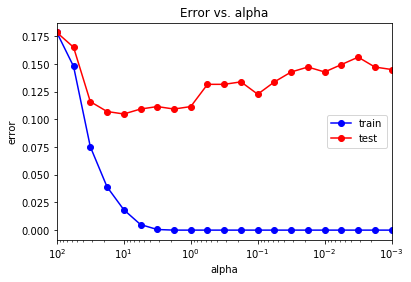

In [73]:
alpha_best = grid.best_estimator_.alpha
print("Оптимальное значение alpha: " + str(alpha_best))
train_err = 1 -  grid.cv_results_['mean_train_score']
test_err = 1 - grid.cv_results_['mean_test_score']

plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.max(alpha_arr), np.min(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

#### Подберем оптимальное значение числа нейронов в скрытом слове при фиксированном `alpha`, полученном на предыдущем шаге

In [74]:
hidden_layer_sizes_arr = np.linspace(10, 100, 21, dtype = int)
hidden_layer_sizes_arr = [(i,) for i in hidden_layer_sizes_arr]

mlp_model = MLPClassifier(alpha=alpha_best, activation = 'logistic', solver='lbfgs')

grid = GridSearchCV(mlp_model, 
                    param_grid={"hidden_layer_sizes": hidden_layer_sizes_arr}, 
                    cv=5, 
                    return_train_score=True)
grid.fit(X, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=MLPClassifier(activation='logistic', alpha=10.0, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'hidden_layer_sizes': [(10,), (14,), (19,), (23,), (28,), (32,), (37,), (41,), (46,), (50,), (55,), (59,), (64,), (68,), (73,), (77,), (82,), (86,), (91,), (95,), (100,)]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

#### Строим графики ошибок на обучающей и валидацинных выборках в зависимости от числа нейронов скрытого слоя

In [75]:
train_err = 1 -  grid.cv_results_['mean_train_score']
test_err = 1 - grid.cv_results_['mean_test_score']

print(train_err)
print(test_err)

[ 0.01617933  0.01729509  0.01729509  0.01729509  0.01729509  0.01785375
  0.01729509  0.01729509  0.01785375  0.01785375  0.01785375  0.01841241
  0.01841241  0.01841241  0.01785375  0.01897107  0.01841241  0.01841241
  0.01841241  0.01841241  0.01841241]
[ 0.109375    0.10491071  0.10491071  0.10491071  0.10491071  0.10491071
  0.10491071  0.10491071  0.10491071  0.10491071  0.10491071  0.10491071
  0.10491071  0.10491071  0.10491071  0.10491071  0.10491071  0.10491071
  0.10491071  0.10491071  0.10491071]


Оптимальное значение числа нейронов скрытого слоя: (14,)


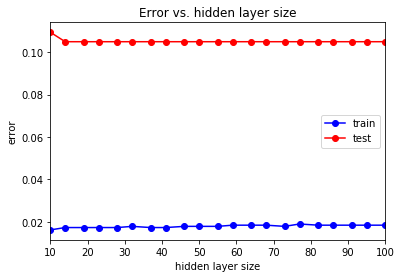

In [76]:
hidden_layer_size_best = grid.best_estimator_.hidden_layer_sizes
print("Оптимальное значение числа нейронов скрытого слоя: " + str(hidden_layer_size_best))
train_err = 1 -  grid.cv_results_['mean_train_score']
test_err = 1 - grid.cv_results_['mean_test_score']

plt.plot(hidden_layer_sizes_arr, train_err, 'b-o', label = 'train')
plt.plot(hidden_layer_sizes_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(hidden_layer_sizes_arr), np.max(hidden_layer_sizes_arr)])
plt.title('Error vs. hidden layer size')
plt.xlabel('hidden layer size')
plt.ylabel('error')
plt.legend()
pass

##### Как видно на графиках, ошибка на тесте при уменьшении параметра `alpha`  сначала убывает, достигает локального минимума, а с последующем уменьшением параметра, ошибка в целом возрастает (наблюдается переобучение). Однако, при фиксированном `alpha`, на ошибку не особо влияет число нейронов в скрытом слое. Можно сделать предположение, что можно обойтись без скрытого слоя, используя обычную логистическую регрессию.

# Random Forests

In [77]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print("Ошибка на обучении: " + str(err_train))
print("Ошибка на тесте: " + str(err_test))

Ошибка на обучении: 0.0
Ошибка на тесте: 0.0592592592593


#### Введём некоторые вспомогательные функции

In [80]:
from sklearn.base import clone

n_estimators_arr = np.logspace(1.5, 3.5, 21, dtype=int)


# Обучение модели
def FitEnsemble(base_model, support_oob = True):
    train_err = []
    test_err = []
    oob_err = []

    for n_estimators in n_estimators_arr:
        model = clone(base_model)
        model.n_estimators = n_estimators
        model.fit(X_train, y_train)

        train_err.append(np.mean(y_train != model.predict(X_train)))
        test_err.append(np.mean(y_test != model.predict(X_test)))
        if (support_oob):
            oob_err.append(1.0 - model.oob_score_)
        
    return train_err, test_err, oob_err


#Рисуем графики ошибок
def DrawErrors(name, train_err, test_err, oob_err):
    n_estimators_best = n_estimators_arr[test_err.index(min(test_err))]
    print("Оптимальное значение числа деревьев: " + str(n_estimators_best))

    plt.semilogx(n_estimators_arr, train_err, 'b-o', label = 'train')
    plt.semilogx(n_estimators_arr, test_err, 'r-o', label = 'test')
    if (len(oob_err) > 0):
        plt.semilogx(n_estimators_arr, oob_err, 'g-o', label = 'oob')
    plt.xlim([np.min(n_estimators_arr), np.max(n_estimators_arr)])
    plt.title(name)
    plt.xlabel('number of estimators')
    plt.ylabel('error')
    plt.legend()
    pass

#### Подсчитаем ошибку и oob-ошику в зависимости от числа деревьев и нарисуем график

In [81]:
train_err, test_err, oob_err = FitEnsemble(RandomForestClassifier(max_depth = 4, oob_score = True))

Оптимальное значение числа деревьев: 1000


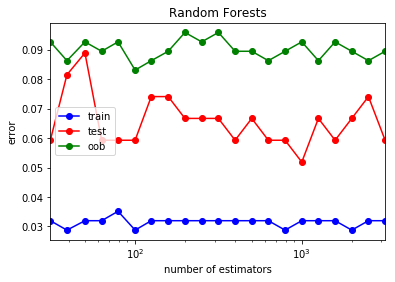

In [82]:
DrawErrors("Random Forests", train_err, test_err, oob_err)

# Extremely random forests

In [83]:
from sklearn.ensemble import ExtraTreesClassifier
train_err, test_err, oob_err = FitEnsemble(ExtraTreesClassifier(max_depth = 4, oob_score = True, bootstrap=True))

Оптимальное значение числа деревьев: 63


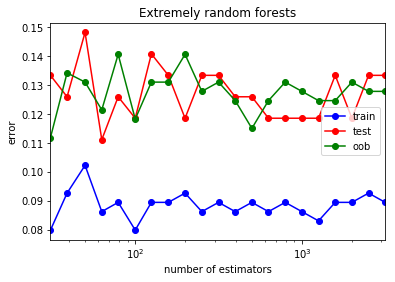

In [84]:
DrawErrors("Extremely random forests", train_err, test_err, oob_err)

# Adaboost

In [85]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
train_err, test_err, oob_err = FitEnsemble(AdaBoostClassifier(DecisionTreeClassifier(max_depth = 4)), False)

Оптимальное значение числа деревьев: 63


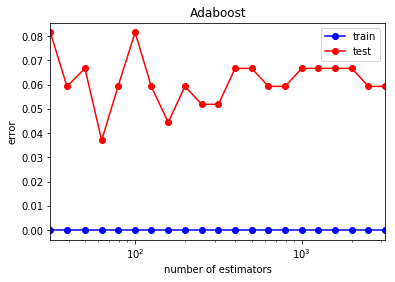

In [86]:
DrawErrors("Adaboost", train_err, test_err, oob_err)

# Gradient boosted trees

In [87]:
from sklearn.ensemble import GradientBoostingClassifier
train_err, test_err, oob_err = FitEnsemble(GradientBoostingClassifier(max_depth = 4), False)

Оптимальное значение числа деревьев: 50


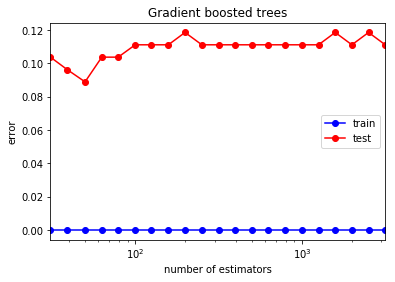

In [88]:
DrawErrors("Gradient boosted trees", train_err, test_err, oob_err)

#### Заметим, что с ростом сложности алгоритмов (с ростом числа деревьев) ошибка на тестовой выборке не возрастает, а колеблется в небольшой амплитуде относительно некоторого постоянного значения. Отсюда можно сделать вывод, что переобучения не происходит. Алгоритмы решают задачу с приемлемой ошибкой от `6%` до `12%`

# PCA

In [89]:
from sklearn.decomposition import PCA


n_components_arr = np.linspace(1, 465, 21, dtype=int)
train_err = []
test_err = []


for n_components in n_components_arr:
    pca = PCA(n_components=n_components)
    pca.fit(X_train)
    
    model = MLPClassifier(hidden_layer_sizes = (100,), alpha=10.0, activation = 'logistic', solver='lbfgs')
    model.fit(pca.transform(X_train), y_train)

    train_err.append(np.mean(y_train != model.predict(pca.transform(X_train))))
    test_err.append(np.mean(y_test != model.predict(pca.transform(X_test))))

#### Изображаем графики зависимости ошибок на обучающей и тестовой выборках в зависимости от числа компонент

Оптимальное значение числа компонент: 70


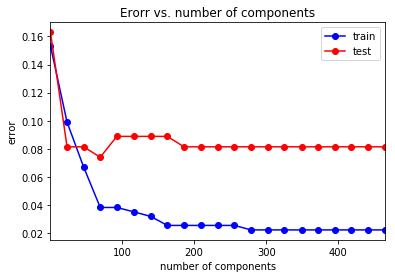

In [90]:
n_components_best = n_components_arr[test_err.index(min(test_err))]
print("Оптимальное значение числа компонент: " + str(n_components_best))

plt.plot(n_components_arr, train_err, 'b-o', label = 'train')
plt.plot(n_components_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(n_components_arr), np.max(n_components_arr)])
plt.title("Erorr vs. number of components")
plt.xlabel('number of components')
plt.ylabel('error')
plt.legend()
pass

#### Как видно из графика, оптимальное значение числа компонент равно 70, что намного меньше числа компонент в исходном признаковом описании (их было 465). При этом заметим, что ошибка на тестовой выборке уменьшилась с `11%` до `8%`